<a href="https://www.kaggle.com/code/erayyglr/baseball-salary-prediction?scriptVersionId=202926024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

## Reading in a dataset

In [3]:
df = pd.read_csv("/kaggle/input/baseball-dataset/hitters.csv")

In [4]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [5]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    fl

## Missing Values

In [6]:
df.isnull().sum()  # Checking NA values

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)  # percentage of NA's

Salary       18.322981
AtBat         0.000000
Hits          0.000000
Errors        0.000000
Assists       0.000000
PutOuts       0.000000
Division      0.000000
League        0.000000
CWalks        0.000000
CRBI          0.000000
CRuns         0.000000
CHmRun        0.000000
CHits         0.000000
CAtBat        0.000000
Years         0.000000
Walks         0.000000
RBI           0.000000
Runs          0.000000
HmRun         0.000000
NewLeague     0.000000
dtype: float64

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=10):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "category", "bool"]]
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "category"] and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols =[col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {cat_cols}")
    print(f"num_cols: {num_cols}")
    print(f"cat_but_car: {cat_but_car}")
    print(f"num_but_car: {num_but_cat}")
    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car =  grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: ['League', 'Division', 'NewLeague']
num_cols: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']
cat_but_car: []
num_but_car: []


In [10]:
df1 =df.copy()

In [11]:
dff = pd.get_dummies(df1[cat_cols + num_cols], drop_first=True)

In [12]:
scaler = RobustScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

In [13]:
imputer = KNNImputer(n_neighbors=5)
dff=pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.336904,-0.410959,-0.583333,-0.464516,-0.408163,-0.677419,-0.714286,-0.526146,-0.519847,-0.480263,-0.509390,-0.567407,-0.575368,1.084589,-0.040881,1.750,-0.593036,0.0,-1.0,0.0
1,-0.251217,-0.205479,-0.083333,-0.619355,-0.163265,0.129032,1.142857,0.489461,0.384593,0.414474,0.173709,0.573333,0.751838,1.946698,0.022013,0.500,0.089286,1.0,0.0,1.0
2,0.387537,0.465753,0.833333,0.464516,0.761905,1.322581,-0.428571,-0.097828,-0.059982,0.335526,-0.053991,0.134815,0.340074,3.096176,0.267296,1.000,0.098214,0.0,0.0,0.0
3,0.453749,0.616438,1.000000,0.438710,0.925170,0.064516,0.714286,1.190668,1.254925,2.467105,1.363850,1.829630,0.674632,-0.055620,-0.179245,-0.375,0.133929,1.0,-1.0,1.0
4,-0.227848,-0.123288,0.166667,-0.232258,-0.054422,-0.161290,-0.571429,-0.493001,-0.478683,-0.335526,-0.467136,-0.517037,-0.505515,2.748552,0.003145,-0.250,-0.595536,1.0,-1.0,1.0


In [14]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
df1 = dff
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,92.9,0.0,0.0,0.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1.0,0.0,1.0


In [15]:
df1.isnull().sum()  # Checking again NA's

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.000,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.000,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.000,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.000,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.750,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.000,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.000,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.250,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.250,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.000,548.0


## Outlier's

In [17]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5 * iqr
    up_limit = quartile3 + 1.5 * iqr
    return low_limit, up_limit

In [18]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None)

In [19]:
for col in num_cols:
    print(col, check_outlier(df1, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [20]:
def grab_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit
    dataframe.loc[dataframe[col_name] < low_limit, col_name] = low_limit
for col in num_cols:
    grab_outliers(df1, col)

In [21]:
for col in num_cols:
    print(col, check_outlier(df1, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [22]:
# Correlation analysis of numerical variables was performed.
def find_correlation(dataframe, numeric_cols, corr_limit=0.60):
    high_correlations = []
    low_correlations = []
    for col in numeric_cols:
        if col == "Salary":
            pass
        else:
            correlation = dataframe[[col, "Salary"]].corr().loc[col, "Salary"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df1, num_cols)

AtBat 0.4697684717685579
Hits 0.49462911758520484
HmRun 0.4088079901802441
Runs 0.47472534491466495
RBI 0.5087476116333021
Walks 0.4892582798515074
Years 0.45411305671026503
CAtBat 0.5885666187271584
CHits 0.6122113962568471
CHmRun 0.6116913982438988
CRuns 0.6303456786762355
CRBI 0.6362041831292827
CWalks 0.5953262210734334
PutOuts 0.294951707379035
Assists 0.05167442656502598
Errors 0.03475609812105891


In [23]:
corr = df1.corr(method="spearman")
corr

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
AtBat,1.000000,0.974957,0.574888,0.926394,0.840804,0.702646,0.087672,0.352724,0.370317,0.356360,0.391364,0.377977,0.315660,0.365001,0.279991,0.367127,0.485580,-0.108260,-0.042478,-0.067684
Hits,0.974957,1.000000,0.567019,0.932100,0.844988,0.692841,0.109848,0.369191,0.394118,0.366377,0.410446,0.397401,0.333247,0.336824,0.254330,0.332851,0.507412,-0.100952,-0.058255,-0.059632
HmRun,0.574888,0.567019,1.000000,0.627415,0.816992,0.502579,0.177826,0.317107,0.324580,0.673536,0.354338,0.458818,0.332559,0.207244,-0.114172,0.041144,0.404654,-0.147086,-0.031951,-0.144012
Runs,0.926394,0.932100,0.627415,1.000000,0.821243,0.757086,0.068014,0.321203,0.341828,0.366187,0.388452,0.354306,0.330514,0.299395,0.169253,0.281854,0.473101,-0.141916,-0.065112,-0.104643
RBI,0.840804,0.844988,0.816992,0.821243,1.000000,0.673524,0.191368,0.399714,0.414105,0.582442,0.433313,0.510415,0.392556,0.291303,0.102412,0.224480,0.509197,-0.142890,-0.073168,-0.114913
Walks,0.702646,0.692841,0.502579,0.757086,0.673524,1.000000,0.175823,0.366314,0.372536,0.423163,0.413577,0.412793,0.511140,0.301542,0.127826,0.180313,0.479337,-0.024688,-0.065684,-0.006813
Years,0.087672,0.109848,0.177826,0.068014,0.191368,0.175823,1.000000,0.909376,0.899669,0.749250,0.881167,0.879473,0.871343,-0.043857,-0.044140,-0.141082,0.641821,-0.057235,-0.012868,-0.054340
CAtBat,0.352724,0.369191,0.317107,0.321203,0.399714,0.366314,0.909376,1.000000,0.997668,0.837420,0.989212,0.971132,0.950018,0.050858,0.048565,-0.016200,0.763639,-0.054062,-0.019016,-0.044093
CHits,0.370317,0.394118,0.324580,0.341828,0.414105,0.372536,0.899669,0.997668,1.000000,0.835663,0.990785,0.970918,0.945808,0.053176,0.041690,-0.019490,0.771916,-0.055102,-0.025333,-0.042684
CHmRun,0.356360,0.366377,0.673536,0.366187,0.582442,0.423163,0.749250,0.837420,0.835663,1.000000,0.845846,0.924423,0.832011,0.098131,-0.129860,-0.094533,0.702708,-0.100202,-0.009765,-0.103482


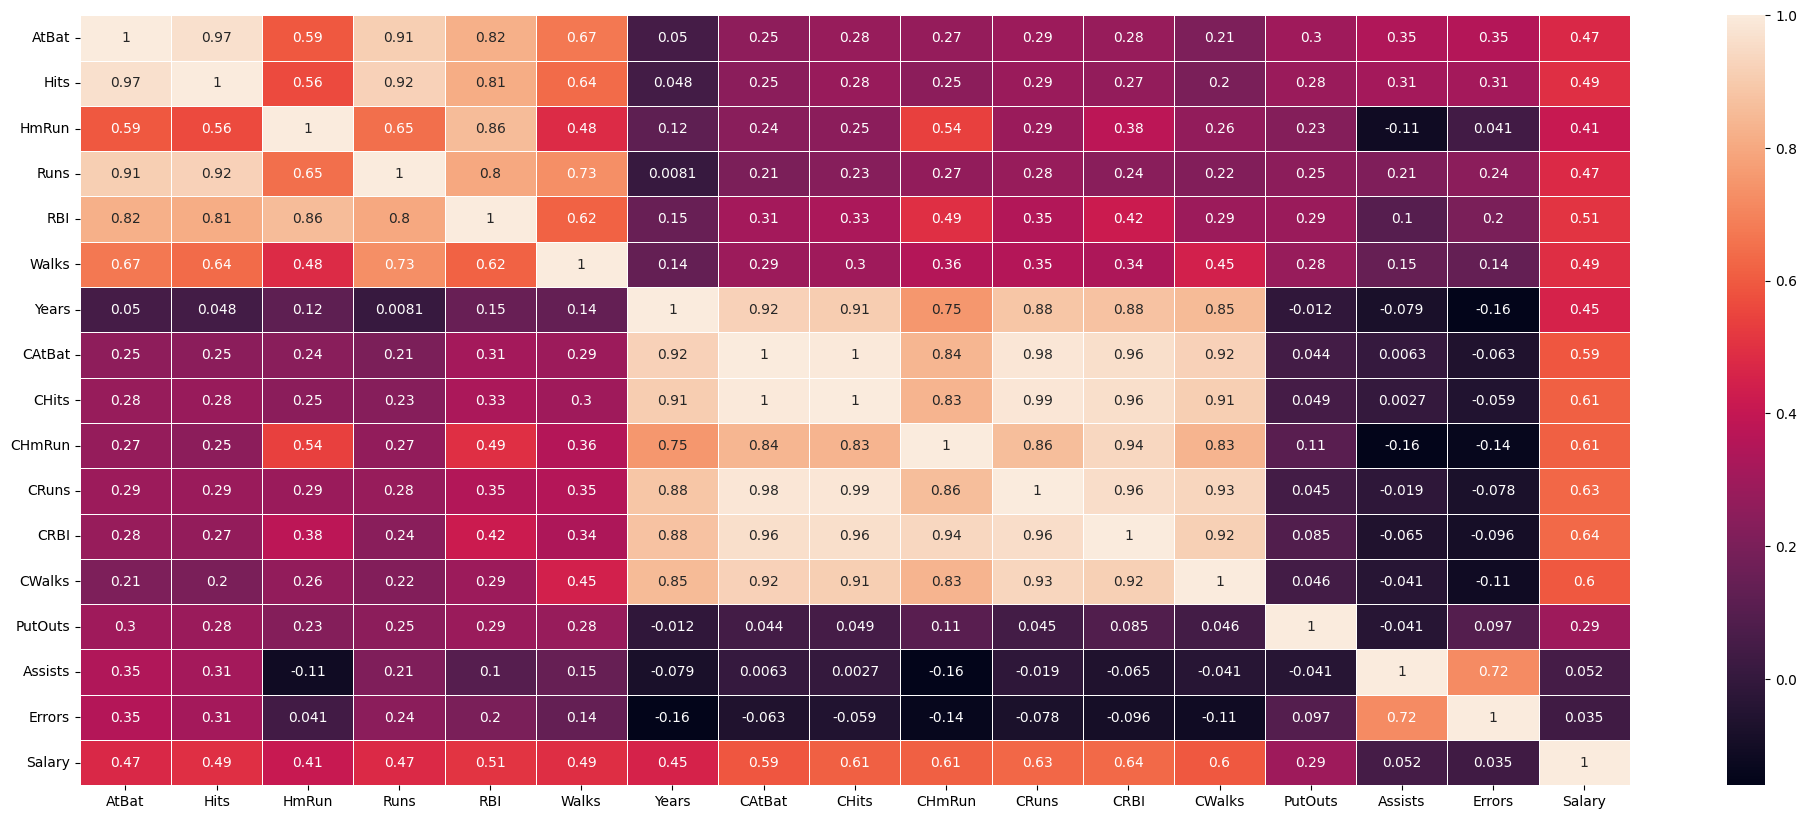

In [24]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(df1[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [25]:
num_cols = [col for col in num_cols if 'Salary' not in col]

ss = StandardScaler()

df1[num_cols] = ss.fit_transform(df1[num_cols]) 

df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.574071,-0.755130,-1.129528,-0.805218,-0.728445,-1.147050,-1.317944,-1.043259,-1.035269,-0.955960,-1.023264,-0.995402,-1.036449,1.048770,-0.548569,1.977149,92.9,0.0,0.0,0.0
1,-0.430437,-0.431732,-0.434323,-1.036370,-0.383835,0.012751,1.345945,0.369158,0.203940,0.119170,-0.104901,0.362791,0.581890,2.060357,-0.471233,0.336742,475.0,1.0,1.0,1.0
2,0.640293,0.624699,0.840219,0.581693,0.918021,1.729256,-0.908115,-0.447592,-0.405190,0.024305,-0.411022,-0.159320,0.079802,2.150774,-0.169623,0.992905,480.0,0.0,1.0,0.0
3,0.751283,0.861858,1.071954,0.543168,1.147761,-0.080033,0.731201,1.344334,1.396417,2.253619,1.495133,1.858568,0.487749,-0.289135,-0.718708,-0.811543,500.0,1.0,0.0,1.0
4,-0.391264,-0.302373,-0.086721,-0.458490,-0.230676,-0.404778,-1.113030,-0.997163,-0.978868,-0.782042,-0.966458,-0.935430,-0.951273,2.150774,-0.494434,-0.647502,91.5,1.0,0.0,1.0


## Modelling

In [26]:
y = df1["Salary"]
X = df1.drop(["Salary"], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
reg_model.coef_

array([ -46.30615805,   74.80145472,   32.75893291,   26.03120134,
        -43.09627989,   22.34596496,  -23.27400662, -952.11137318,
        849.47722235,   48.80563029,   76.10261589,  221.6124286 ,
         20.01050666,   69.30179644,   44.59500518,  -26.23456932,
         98.5547605 ,  -54.65694328,  -54.70822423])

In [30]:
reg_model.intercept_

505.3936108529274

In [31]:
y_pred = reg_model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 75226.05756751953
R-squared: 0.5168001127796584


In [33]:
reg_model.score(X_train, y_train)

0.6104470494010716

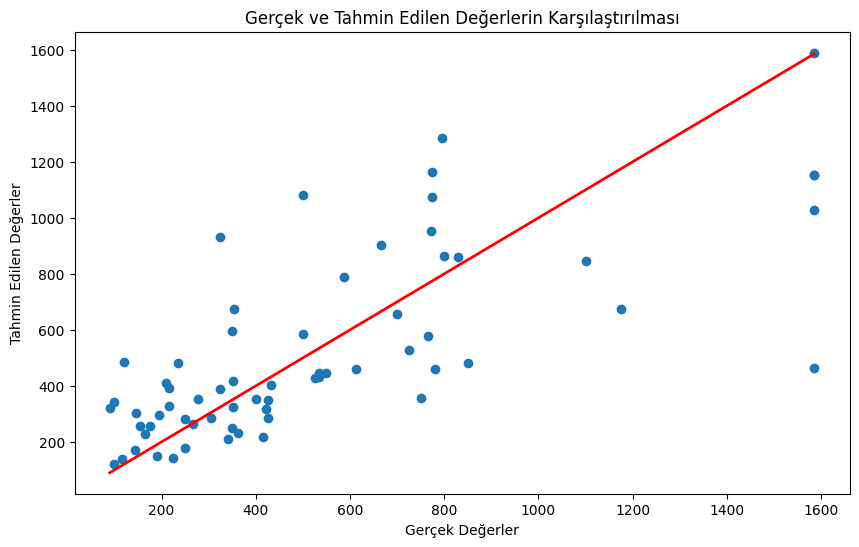

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.show()